# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
# YH.env file is not included in the folder
# Please update the file name with your own .env file.
load_dotenv("YH.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_df = requests.get(btc_url).json()
btc_price = btc_df['data']['1']['quotes']['USD']['price']

In [8]:
# Fetch current ETH price
eth_df = requests.get(eth_url).json()
eth_price = eth_df['data']['1027']['quotes']['USD']['price']

In [9]:
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48805.20
The current value of your 5.3 ETH is $14865.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                  SPY          \
                          open   high  low   close   volume    open    high   
time                                                                          
2021-04-19 00:00:00-04:00  114  114.5  114  114.44  4820664  416.26  416.74   

                                                     
                              low   close    volume  
time                                                 
2021-04-19 00:00:00-04:00  413.79  415.24  66226327

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.44
Current SPY closing price: $415.24


In [14]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20762.00
The current value of your 200 AGG shares is $22888.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
portfolio_amount = {
    'amount': [my_btc_value + my_eth_value, my_agg_value + my_spy_value]
}

portfolio_mix = ['crypto', 'shares']
df_savings = pd.DataFrame(portfolio_amount, index=portfolio_mix)


# Display savings DataFrame
display(df_savings)

,amount
crypto,63671.011
shares,43650.000


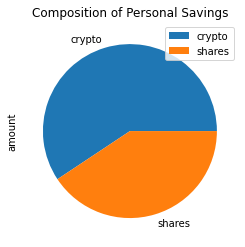

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings');

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value + my_agg_value + my_spy_value

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your financial goal.')
else: print(f'You are {(emergency_fund - total_savings):.2f} away from reaching your goal!')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning - REVISIT

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.dropna(inplace=True)
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103.0

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
weights = [0.6, 0.4]
num_yrs = 30
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

In [21]:
# Printing the simulation input data
MC_portfolio.portfolio_data

AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705   1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490   2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650   1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690   2197732.0   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660   2071970.0   
...                           ...       ...       ...      ...         ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420.0   

                                             SPY                          \
                          daily_return      open    high     low   close   
time                                                                       
2016-08-18 00:00:00-04:00          NaN  218.3300  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.3100  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.2700  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.2500  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.8200  218.91  217.36  217.88   
...                                ...       ...     ...     ...     ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.62  327.73  328.76   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.06  327.86  330.03   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.39  331.18  332.06   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.46  331.13  334.31   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.88  332.30  334.55   

                                                    
                               volume daily_return  
time                                                
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014  
2016-08-24 00:00:00-04:00  50310103.0    -0.004842  
...                               ...          ...  
2020-08-03 00:00:00-04:00  71741125.0     0.006768  
2020-08-04 00:00:00-04:00  73684427.0     0.003863  
2020-08-05 00:00:00-04:00  72846458.0     0.006151  
2020-08-06 00:00:00-04:00  76900649.0     0.006776  
2020-08-07 00:00:00-04:00  98710236.0     0.000718  

[999 rows x 12 columns]

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006465,1.006263,0.979362,0.997928,1.003698,1.001835,1.002467,0.997909,1.000983,0.998969,...,0.995421,1.000254,1.006929,0.993364,0.999547,0.999136,1.000267,1.010560,1.005773,1.000438
2,1.000599,1.003240,0.979365,0.996541,1.017054,1.003946,1.009895,0.993711,1.000142,1.003457,...,1.007655,0.996938,0.999454,0.992318,0.994330,0.998555,0.999084,1.007882,1.007681,0.991239
3,0.994413,1.005653,0.984592,0.991423,1.005841,1.005857,1.001463,0.989357,1.003137,1.001174,...,1.010900,0.990326,0.994460,0.992790,0.985869,0.990893,0.993289,0.997888,1.000714,0.991017
4,0.999014,1.003783,0.978800,0.996025,1.004884,1.003597,1.002819,0.993480,1.004233,1.013359,...,1.004961,0.998448,1.003060,0.989442,0.989000,0.985630,0.992097,0.998742,0.998921,0.990284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.620900,5.365174,5.107516,9.940350,3.952054,2.932617,5.005343,2.082497,1.725876,8.729735,...,4.853183,4.895815,4.781620,7.732280,4.893264,3.460477,4.117233,4.847441,2.514667,7.658612
7557,2.601668,5.378049,5.125014,9.961855,3.942899,2.934877,5.024989,2.106650,1.723229,8.715389,...,4.891555,4.925826,4.780212,7.636345,4.905613,3.446382,4.107334,4.845686,2.509844,7.685088
7558,2.602364,5.412692,5.109641,10.054626,3.920188,2.950257,5.066866,2.098963,1.727529,8.691715,...,4.920381,4.954425,4.807879,7.694713,4.895097,3.455956,4.099636,4.828282,2.506380,7.692489
7559,2.592795,5.417852,5.138867,9.994068,3.930406,2.950261,5.077180,2.095216,1.744596,8.686895,...,4.949188,5.007566,4.784506,7.629054,4.889934,3.462778,4.106898,4.845843,2.479821,7.720468


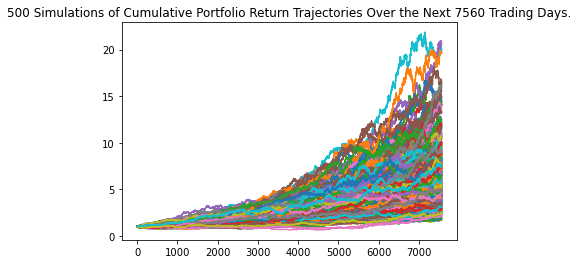

In [23]:
# Plot simulation outcomes
MC_portfolio.plot_simulation();

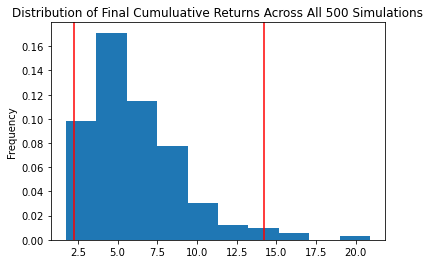

In [24]:
# Plot probability distribution and confidence intervals
MC_portfolio.plot_distribution();

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.143797
std               2.975062
min               1.742070
25%               4.066704
50%               5.442652
75%               7.662940
max              20.896007
95% CI Lower      2.236219
95% CI Upper     14.213694
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44724.37 and $284273.88


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $67086.56 and $426410.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500
weights = [0.9, 0.1]
num_yrs = 5
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002515,1.000497,1.004259,1.004772,0.997954,0.997449,0.999566,1.002308,0.998083,0.997447,...,0.997270,0.996488,0.995543,1.000072,1.002185,1.003690,1.002143,0.999800,0.999265,1.005824
2,1.002421,1.000743,1.003873,1.010104,0.997019,1.000010,0.994404,1.004953,1.007648,0.999905,...,0.998992,0.996145,0.992866,1.000547,1.002717,1.001996,1.008209,1.000380,0.995186,1.007022
3,1.007442,1.002075,0.999131,1.010640,0.995539,1.001326,0.990539,1.005932,1.011241,1.004111,...,1.002038,0.999460,0.992501,1.003442,0.998208,0.997647,1.007696,1.003067,0.995248,1.004979
4,1.005218,1.007981,0.999712,1.011710,0.998412,0.999951,0.990547,1.002500,1.008816,1.006008,...,1.001609,0.998045,0.996564,0.998467,0.997983,0.995155,1.008712,1.000885,0.997611,1.008467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.245945,1.264318,1.084887,1.318972,1.221359,1.126288,1.280988,1.036319,0.967827,1.147304,...,1.274226,1.042007,1.217466,1.159067,1.142796,1.034298,1.021764,1.007312,0.965542,1.122254
1257,1.234464,1.265414,1.082875,1.316969,1.215398,1.126469,1.277909,1.041569,0.962169,1.151500,...,1.275786,1.042275,1.210001,1.160305,1.147061,1.033115,1.024042,1.014759,0.971888,1.121645
1258,1.247662,1.256814,1.082511,1.311708,1.216588,1.127028,1.276157,1.042513,0.964044,1.156458,...,1.275753,1.045339,1.211734,1.161463,1.149991,1.038033,1.026354,1.015075,0.975517,1.120958
1259,1.242399,1.255996,1.086399,1.312818,1.215302,1.129706,1.272039,1.038961,0.965819,1.159460,...,1.283807,1.041563,1.211337,1.168767,1.155098,1.039854,1.020987,1.015194,0.977029,1.116379


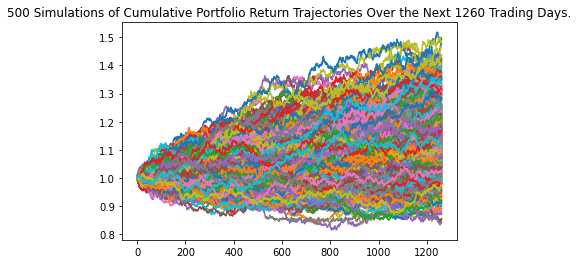

In [30]:
# Plot simulation outcomes
MC_portfolio.plot_simulation();

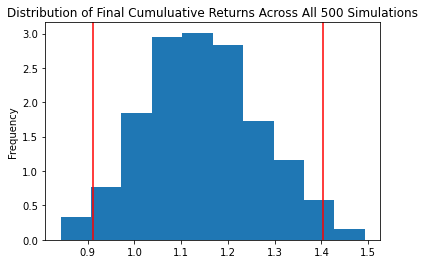

In [31]:
# Plot probability distribution and confidence intervals
MC_portfolio.plot_distribution();

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.144244
std               0.124190
min               0.841976
25%               1.057693
50%               1.140677
75%               1.225714
max               1.492788
95% CI Lower      0.912251
95% CI Upper      1.402488
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 150000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment, 2)
ci_upper_five = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $150000 in the portfolio over the next 5 years will end within in the range of $136837.63 and $210373.26


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
weights = [0.85, 0.15]
num_yrs = 10
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006562,1.003790,1.006517,1.006004,1.000027,1.001286,1.001422,0.997222,0.994590,1.001546,...,1.000628,0.997849,1.000529,1.000990,0.993971,1.001519,1.003633,0.999527,0.998557,1.005830
2,1.005746,1.004766,1.008852,1.005554,0.995447,1.003944,1.004140,0.997513,0.997961,0.994198,...,1.004470,1.001828,1.005435,0.999675,0.994262,1.002341,1.005091,0.999693,0.996516,1.007271
3,1.004415,1.004710,1.009728,1.003530,0.997412,1.004434,1.006688,0.993938,1.003688,0.988461,...,1.003979,1.002726,0.999414,1.003288,0.993357,1.001205,1.008276,0.998037,0.996744,1.007288
4,1.001642,1.001537,1.012892,1.001165,1.001350,1.005550,1.007469,0.995422,1.006881,0.987583,...,0.999853,1.001432,1.001653,1.003966,0.988816,1.000289,1.011372,0.997796,0.997349,1.004081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.442252,1.439306,1.112846,1.344073,1.310371,1.441039,1.396846,1.301553,1.328701,0.955055,...,1.462912,1.437663,1.612897,0.995490,1.532717,1.117968,2.294726,1.085414,1.131802,1.342720
2517,1.447457,1.448282,1.111211,1.343664,1.315747,1.446109,1.398342,1.291883,1.331177,0.958144,...,1.469792,1.433922,1.607830,0.993827,1.526726,1.111439,2.293371,1.084309,1.132313,1.345074
2518,1.446816,1.455615,1.113944,1.342493,1.318961,1.447768,1.389148,1.295966,1.335939,0.961992,...,1.459443,1.430889,1.599402,0.991091,1.523165,1.114787,2.287879,1.090340,1.132080,1.346453
2519,1.443707,1.454778,1.114348,1.345118,1.308324,1.444202,1.389494,1.291873,1.335743,0.963654,...,1.456330,1.426779,1.603872,0.994567,1.524803,1.115742,2.294982,1.094651,1.134033,1.346004


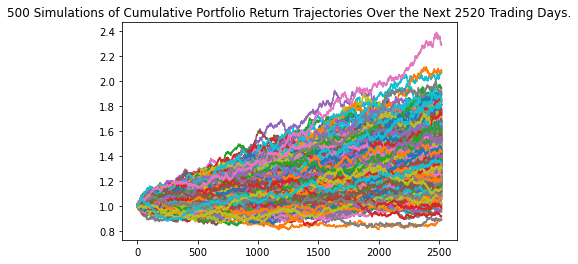

In [42]:
# Plot simulation outcomes
MC_portfolio.plot_simulation();

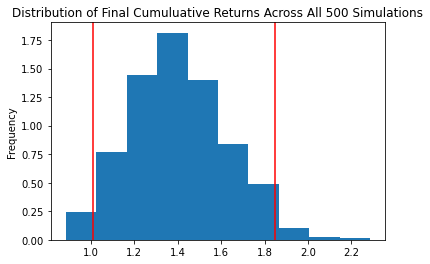

In [43]:
# Plot probability distribution and confidence intervals
MC_portfolio.plot_distribution();

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.403705
std               0.222822
min               0.885465
25%               1.238164
50%               1.388522
75%               1.553954
max               2.286178
95% CI Lower      1.010247
95% CI Upper      1.847026
Name: 2520, dtype: float64


In [45]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment, 2)
ci_upper_ten = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $101024.69 and $184702.62
